# Lab 7: Mining Social-Network Graphs
Data Mining 2021/2022  
Ruben Wiersma and Gosia Migut  
Revised by Bianca Cosma

**WHAT** This *optional* lab consists of several programming exercises and insight questions. 
These exercises are meant to let you practice with the theory covered in: [Chapter 10][1] from "Mining of Massive Datasets" by J. Leskovec, A. Rajaraman, J. D. Ullman.

**WHY** Practicing, both through programming and answering the insight questions, aims at deepening your knowledge and preparing you for the exam. 

**HOW** Follow the exercises in this notebook either on your own or with a friend. Use [StackOverflow][2] to discuss the questions with your peers. For additional questions and feedback please consult the TAs during the assigned lab session. The answers to these exercises will not be provided.

[1]: http://infolab.stanford.edu/~ullman/mmds/ch10.pdf
[2]: https://stackoverflow.com/c/tud-cs/questions

#### Summary
In this exercise, we will practice with Spectral Clustering to analyse social networks. To this end, we will create an adjacency matrix, set up a Laplacian matrix, compute the eigenvalue decomposition and perform clustering. Finally, we will use the code that you developed to cluster a large social network graph into more than two clusters.

**Note:** The aim of this lab is to give you a deeper understanding of spectral clustering. To that end, it will require you to do solve some mathematical equations and dust off your linear algebra skills. So take out your pen and paper and be ready to write out the math related parts.

## Exercise 1: Spectral Graph Clustering

You are working for a popular social networking site, FriendBase. Your managers have thought of a wonderful new feature: InstaGroups<sup>TM</sup>. InstaGroups<sup>TM</sup> will automatically suggest a clustering of your group of friends, so you can easily send messages to- and post memes meant only for a select group.

In order to start working on this problem, you are given a small dataset with nine people (given as a list) and their friendships. The friendships are provided in a list of tuples, where each tuple in the list represents a friendship, e.g.: `('Albert', 'Bob')` represents a friendship between Albert and Bob. Each friendship is undirected, so a friendship defined for `('Albert', 'Bob')` will also hold for `('Bob', 'Albert')`.

In [1]:
class Graph(object):
    """
    Very simple graph class that holds a list of nodes and a list of edges connecting the nodes.
    Feel free to extend the functionality of this class to better organise your code.
    """
    
    def __init__(self, nodes=[], edges=[]):
        self.nodes = nodes
        self.edges = edges

In [2]:
# List of people, the nodes in the graph.
people = ['Alice',
           'Bob',
           'Claudia',
           'Dennis',
           'Ellie',
           'Frida',
           'George',
           'Harry',
           'Irene']

# Friendships between people, the edges in the graph.
friendships = [('Alice', 'Bob'),
               ('Alice', 'Claudia'),
               ('Alice', 'Dennis'),
               ('Bob', 'Claudia'),
               ('Bob', 'Dennis'),
               ('Bob', 'Frida'),
               ('Claudia', 'Dennis'),
               ('Claudia', 'Irene'),
               ('Dennis', 'Ellie'),
               ('Ellie', 'Frida'),
               ('Ellie', 'George'),
               ('Frida', 'George'),
               ('Frida', 'Harry'),
               ('George', 'Harry')]

friend_graph = Graph(people, friendships)

$\textbf{Question 1}$: Draw a graph of this network for yourself to visualise the network. What are the nodes? What are the edges in your graph? 
  
$\textbf{Question 2}$: Based on your drawing, how many clusters would you create? Which cluster would each person be assigned to? 

### Step 1: Building the adjacency matrix

We will now apply Spectral Clustering to this problem. To do so, we will need an adjacency matrix of this social network.

Remember that the adjacency matrix $\mathbf{A}$ is an $n \times n$ matrix, where $n$ is the number of nodes in your graph. The entry at row $i$ and column $j$ is 1 if there is an edge between node $i$ and node $j$. We denote this as $a_{ij} = 1$, otherwise, $a_{ij} = 0$.

Construct the adjacency matrix for the provided dataset.

**Hint:** you can use `list.index(element)` to find the index of a given element.

In [3]:
import numpy as np
import random
np.random.seed(42)
random.seed(42)

def create_adjacency_matrix(graph):
    """
    Creates and returns the adjacency matrix for a given graph.
    """
    
    adjacency_matrix = np.zeros((len(graph.nodes), len(graph.nodes)))

    # START ANSWER
    for edge in graph.edges:
        i,j = graph.nodes.index(edge[0]),graph.nodes.index(edge[1])
        adjacency_matrix[i][j] = 1
        adjacency_matrix[j][i] = 1
    # END ANSWER
    
    return adjacency_matrix

adjacency_matrix = create_adjacency_matrix(friend_graph)
# Check that the matrix is symmetric.
assert np.array_equal(adjacency_matrix, np.transpose(adjacency_matrix))
# Check Claudia's connections.
assert np.array_equal(adjacency_matrix[2], [1., 1., 0., 1., 0., 0., 0., 0., 1.])

adjacency_matrix

array([[0., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 0., 1., 1., 0., 1., 0., 0., 0.],
       [1., 1., 0., 1., 0., 0., 0., 0., 1.],
       [1., 1., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.]])

### Step 2: Build the graph Laplacian

The next step is to compute the Laplacian matrix given this adjacency matrix. The Laplacian of a graph is defined as

$$L = D - A$$

where $D$ is the degree matrix which describes the number of edges for each node on the diagonal of an $n \times n$ matrix
$$d_{ii} = \sum_{j \in \delta(i)} 1$$

Complete the provided functions to compute the Laplacian of the graph for the FriendBook dataset.

In [12]:
def compute_degree_matrix(adjacency_matrix):
    """
    Computes the degree matrix from an adjacency matrix.
    """
    
    degree_matrix = np.zeros_like(adjacency_matrix)
    
    # START ANSWER
    for idx, row in enumerate(adjacency_matrix):
        count = 0
        for entry in row:
            count += entry
        degree_matrix[idx][idx] = count
    # END ANSWER
    
    return degree_matrix

def compute_laplacian(adjacency_matrix):
    """
    Computes the Laplacian matrix from an adjacency matix.
    """
    
    laplacian = np.zeros_like(adjacency_matrix)
    
    # START ANSWER
    laplacian = compute_degree_matrix(adjacency_matrix) - adjacency_matrix
    # END ANSWER
    
    return laplacian

laplacian = compute_laplacian(adjacency_matrix)
# Check that the Laplacian matrix is symmetric.
assert np.array_equal(laplacian, np.transpose(laplacian))
# Check the diagonal values of the Laplacian matrix.
assert np.array_equal(np.diagonal(laplacian), np.sum(adjacency_matrix, axis=1))

laplacian

array([[ 3., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  4., -1., -1.,  0., -1.,  0.,  0.,  0.],
       [-1., -1.,  4., -1.,  0.,  0.,  0.,  0., -1.],
       [-1., -1., -1.,  4., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  3., -1., -1.,  0.,  0.],
       [ 0., -1.,  0.,  0., -1.,  4., -1., -1.,  0.],
       [ 0.,  0.,  0.,  0., -1., -1.,  3., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1., -1.,  2.,  0.],
       [ 0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  1.]])

In order to grow your intuition of the Laplacian matrix, we will do a small exercise. Let's say you know the height of every person in the dataset. You can store these heights in a vector $\mathbf{v}$ of length $n$. The $i$<sup>th</sup> element of the vector, $v_i$, stores the height for person $i$.

$\textbf{Question 3}$: What happens if you multiply the Laplacian matrix with the heights of each person, i.e. $\mathbf{L}\mathbf{v}$? Try doing this with a very small graph consisting of three nodes: a, b, c, where (a, b) and (a, c) are connected and the heights of a, b, and c are 2, 3, and 4, respectively.

$\textbf{Question 4}$: What if all people have the same height, e.g. $\mathbf{v} = \mathbf{1} = [1, 1, 1, ...]^T$?    
  
$\textbf{Question 5}$: What are you computing this way?  
**Hint:** What's the difference in height between each pair? How would you compute the average of these differences?

### Step 3: Eigenvalue decomposition

The next step in the Spectral Clustering algorithm is to compute the eigenvalue decomposition of the Laplacian matrix. If you would like to better understand eigenvalues and eigenvectors, watch [this video on eigenvectors][1].

Compute the eigenvalue decomposition of the Laplacian matrix and print the eigenvalues and eigenvectors corresponding to the *first three* eigenvalues in increasing order.

**Hint:** To get the eigenvalues and eigenvectors, you should use the [`np.linalg.eigh`][2] function. It returns an array of eigenvalues in ascending order, and a matrix whose columns are the corresponding eigenvectors. `eigh` is faster than [`eig`][3] (which works for arbitrary matrices) but it should only be called with a real **symmetric** matrix. You have to make sure the input matrix you pass to this function is symmetric (but it will be in our case).

Your first three eigenvalues should be approximately:
- $0.0$
- $0.527$
- $1.213$

[1]: https://www.youtube.com/watch?v=PFDu9oVAE-g&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=13
[2]: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html
[3]: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [18]:
from numpy import linalg as la
from numpy.testing import assert_array_equal

# You should replace these values with those computed by the eigh function.
# v will be the array of eigenvectors, and w will be the eigenvector matrix.
v, w = np.linalg.eigh(laplacian)

# START ANSWER
# END ANSWER

assert np.all(np.isclose(v, [-5.98479599e-16, 0.52726226, 1.21252584, 2.434483515, 3.99999999, 4, 4.60413038, 5.32364198, 5.89795599], atol=0.000001))

$\textbf{Question 6}$: What is the first eigenvalue and its corresponding eigenvector? Did you expect this result?

### Step 4: Perform Spectral Clustering
You will now perform the final step in the Spectral Clustering algorithm: the actual clustering. Use the second eigenvector of the Laplacian matrix.

Each person is assigned to a cluster based on the sign of their entry in the eigenvector. For example: if we have eigenvector $[3, 7, -2, 4, -3, 5, 2, -8, 1]^T$, we know that Alice, Bob, Dennis, Frida, George, and Irene should be in one cluster and that Claudia, Ellie, and Harry are in the other.

Complete the following functions to create and print the cluster assignment in a readable way.

$\textbf{Question 7}$: Compare the results to your answer to $\textbf{Question 1}$. Did you get the same clustering?  

In [34]:
def second_eigenvector(laplacian):
    """
    Returns the eigenvector corresponding to the second eigenvalue, as a row.
    Note that the eigenvalues are given in ascending order.
    """
    v, w = la.eigh(laplacian)
    
    second_w = np.ones((laplacian.shape[0], 1))
    # START ANSWER
    second_w = w[:,1].T
    # END ANSWER
    return second_w

def spectral_cluster(g):
    """
    Clusters a graph given by nodes and edges using spectral clustering.
    Returns two graphs given by nodes1, edges1 and nodes2, edges2, respectively.
    """
    nodes1, edges1 = [], []
    nodes2, edges2 = [], []
    
    adjacency_matrix = create_adjacency_matrix(g)
    laplacian = compute_laplacian(adjacency_matrix)
    
    second_w = second_eigenvector(laplacian)
    print(second_w)
    nodes = g.nodes
    # START ANSWER
    for i in range(len(second_w)):
        if second_w[i] > 0:
            nodes1.append(nodes[i])
        else:
            nodes2.append(nodes[i])
    
    for edge in g.edges:
        if edge[0] in nodes1 and edge[1] in nodes1:
            edges1.append(edge)
        elif edge[0] in nodes2 and edge[1] in nodes2:
            edges2.append(edge)
            
    # END ANSWER
    
    g1 = Graph(nodes1, edges1)
    g2 = Graph(nodes2, edges2)
    
    print(g1.nodes)
    print(g2.nodes)
    return g1, g2
        
graph1, graph2 = spectral_cluster(friend_graph)
assert (np.array_equal(np.sort(graph1.nodes), ['Alice', 'Bob', 'Claudia', 'Dennis', 'Irene']) \
        and np.array_equal(np.sort(graph2.nodes), ['Ellie', 'Frida', 'George', 'Harry'])) \
        or (np.array_equal(np.sort(graph2.nodes), ['Alice', 'Bob', 'Claudia', 'Dennis', 'Irene']) \
        and np.array_equal(np.sort(graph1.nodes), ['Ellie', 'Frida', 'George', 'Harry']))

print("Cluster 1 nodes:", graph1.nodes)
print("Cluster 2 nodes:", graph2.nodes)

[ 0.20002865  0.09413163  0.29466661  0.10582016 -0.22134123 -0.27362097
 -0.379518   -0.44348627  0.62331942]
['Alice', 'Bob', 'Claudia', 'Dennis', 'Irene']
['Ellie', 'Frida', 'George', 'Harry']
Cluster 1 nodes: ['Alice', 'Bob', 'Claudia', 'Dennis', 'Irene']
Cluster 2 nodes: ['Ellie', 'Frida', 'George', 'Harry']


Now let's also print the edges in the two graphs.  
**Note:** Make sure all edges between the nodes in a cluster are there, and there are no edges connecting the two clusters.

In [35]:
print("Cluster 1 edges:")
for edge in graph1.edges:
    print(edge)

print()
print("Cluster 2 edges:")
for edge in graph2.edges:
    print(edge)

Cluster 1 edges:
('Alice', 'Bob')
('Alice', 'Claudia')
('Alice', 'Dennis')
('Bob', 'Claudia')
('Bob', 'Dennis')
('Claudia', 'Dennis')
('Claudia', 'Irene')

Cluster 2 edges:
('Ellie', 'Frida')
('Ellie', 'George')
('Frida', 'George')
('Frida', 'Harry')
('George', 'Harry')


### Step 6: Implement recursive clustering
Now we will extend this method to create partitions greater than $2$. As described in the lecture, there are two possible ways to proceed:
1. Recursively partition each cluster using the spectral clustering algorithm until you have reached $k$ partitions.
2. Use $d$ eigenvectors to construct a $d$-dimensional space and apply a classical clustering algorithm.

The first technique is quite straightforward, so let's implement it right away and see how it performs. For now, we will limit our implementation to $k$ being powers of $2$.

In [36]:
from math import log2

def recursive_cluster_k(g, k):
    assert k <= len(g.nodes)
    assert log2(k) % 1 == 0
    
    depth = log2(k)
    return recursive_cluster(g, depth)

def recursive_cluster(g, depth):
    """
    Recursively clusters graph g until depth is 0.
    If you want, you can also implement this method iteratively (with a for loop).
    """
    # Base case
    if depth == 0:
        return [g]
     
    clusters = []
    # START ANSWER
    g1, g2 = spectral_cluster(g)
    cl_a = recursive_cluster(g1, depth-1)
    cl_b = recursive_cluster(g2, depth-1)
    
    for cl in cl_a:
        clusters.append(cl)
    for cl in cl_b:
        clusters.append(cl)
    # END ANSWER
        
    return clusters
        
clusters = recursive_cluster_k(friend_graph, 4)
# Check that the clusters have the correct nodes.
assert frozenset(map(lambda x : frozenset(x.nodes), clusters)) == frozenset([frozenset(['Alice', 'Bob', 'Dennis']),
                                                                             frozenset(['Claudia', 'Irene']),
                                                                             frozenset(['Ellie', 'George']),
                                                                             frozenset(['Frida', 'Harry'])])
for cluster in clusters:
    print(cluster.nodes)    

[ 0.20002865  0.09413163  0.29466661  0.10582016 -0.22134123 -0.27362097
 -0.379518   -0.44348627  0.62331942]
['Alice', 'Bob', 'Claudia', 'Dennis', 'Irene']
['Ellie', 'Frida', 'George', 'Harry']
[-2.88675135e-01 -2.88675135e-01  3.27763280e-17 -2.88675135e-01
  8.66025404e-01]
['Claudia', 'Irene']
['Alice', 'Bob', 'Dennis']
[ 7.07106781e-01 -2.91659768e-17  3.58693823e-17 -7.07106781e-01]
['Ellie', 'George']
['Frida', 'Harry']
['Claudia', 'Irene']
['Alice', 'Bob', 'Dennis']
['Ellie', 'George']
['Frida', 'Harry']


### Step 7: Construct a subspace out of the eigenvectors

Now for the second technique: Use $d$ eigenvectors to construct a $d$-dimensional space and apply a classical clustering algorithm. Let's break up this sentence to see what it means.

1. _Use $d$ eigenvectors to construct a $d$-dimensional space._

The $d$ eigenvectors you select are the bases of a $d$-dimensional space (check out the video linked in exercise 3 to see why). In order to get the coordinates of a point in this new space, all we need to do is compute the dot product between the vector representation of that point in the original space and the eigenvector corresponding to each dimension. The vector representation $\mathbf{v}$ of a node $i$ in the original space is an $n \times 1$ vector with all zeros and $v_i = 1$.

If you compute the dot product with each eigenvector, you get $d$ 'coordinates' for that node in the new $d$-dimensional space, which is called the spectral transform.

We can use a quick shortcut to get the coordinates for each node in the graph: we can simply concatenate the $d$ eigenvectors into an $n \times d$ matrix (try writing it out). The dataset of new features will look like this: [$w_1$, $w_2$, ..., $w_d$], where $w_j$ is the $j$-th eigenvector.

2. _Apply a classical clustering algorithm._

Now that you have $d$ coordinates for each node, we can feed these new coordinates (or features) into a standard clustering algorithm, like hierarchical clustering or k-means. We will not implement this step but use an existing algorithm for [agglomerative clustering][1] from scikit-learn library. We will also plot the new coordinates. Of course, you can also use another clustering algorithm or your own implementation from the Machine Learning course.

Let's get started! We will use only two eigenvectors, so we can plot the new coordinates. So we will call the function you implemented, `spectral_coordinates`, with `d`=2.  
**Note:** Remember that we don't use the very first eigenvector as it consists of only 1s.

[1]: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

[[ 0.20002865  0.43236013]
 [ 0.09413163  0.30177413]
 [ 0.29466661  0.14190784]
 [ 0.10582016  0.32915058]
 [-0.22134123  0.04145663]
 [-0.27362097 -0.06223096]
 [-0.379518   -0.19281696]
 [-0.44348627 -0.323881  ]
 [ 0.62331942 -0.6677204 ]]


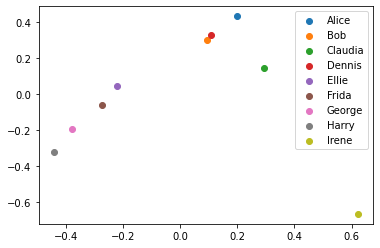

In [51]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

def spectral_coordinates(laplacian, d):
    """
    Returns an n x d matrix, where n is the number of rows in the laplacian matrix. 
    Each row in this matrix represents the spectral coordinates of a point in a d-dimensional space.
    """
    v, w = la.eigh(laplacian)
    
    coordinates = np.ones((laplacian.shape[0], d))    
    
    # START ANSWER
    for i in range(d):
        coordinates.T[i] = w.T[i + 1]
    # END ANSWER
    return coordinates

def spectral_cluster_k(g, k):    
    adjacency_matrix = create_adjacency_matrix(g)
    laplacian = compute_laplacian(adjacency_matrix)
    
    coordinates = spectral_coordinates(laplacian, 2)
    
    for i in range(len(coordinates)):
        plt.scatter(coordinates[i, 0], coordinates[i, 1])
    plt.legend(people)
    plt.show()
    
    return coordinates

coordinates = spectral_cluster_k(friend_graph, 4)

$\textbf{Question 8}$: What do the axes mean in this plot?  

In [52]:
# Here you can investigate how the clusters were assigned.
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=4).fit_predict(coordinates)

for index, cluster in enumerate(clustering):
    print("{} belongs to cluster {}".format(people[index], cluster))

Alice belongs to cluster 0
Bob belongs to cluster 0
Claudia belongs to cluster 0
Dennis belongs to cluster 0
Ellie belongs to cluster 1
Frida belongs to cluster 1
George belongs to cluster 2
Harry belongs to cluster 2
Irene belongs to cluster 3


$\textbf{Question 9}$: Did you get the same clustering results using the two methods? If yes, will that always be the case? If no, what is the difference?